In [42]:

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
data =  pd.read_csv("cars.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
data.drop('torque',axis=1,inplace=True)

In [13]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [14]:
data['mileage'] = data['mileage'].str.extract(r'(\d+.\d+)').astype('float')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,5.0


In [15]:
data['engine'] = data['engine'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,5.0


In [16]:
data['max_power'] = data['max_power'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,10352.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,882.0,5.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [18]:
data.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           381
engine            121
max_power         321
seats               9
dtype: int64

In [19]:
data = data.drop(columns=['name'])
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,10352.0,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.0,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,882.0,5.0


In [20]:
data['year'] = 2022 - data['year']
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,8,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,5.0
1,8,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,10352.0,5.0
2,16,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.0,5.0
3,12,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,5.0
4,15,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,882.0,5.0


In [21]:
labels,counts = pd.factorize(data['owner'])
data['owner'] = labels
labels,counts = pd.factorize(data['transmission'])
data['transmission'] = labels

labels,counts = pd.factorize(data['fuel'])
data['fuel'] = labels

labels,counts = pd.factorize(data['seller_type'])
data['seller_type'] = labels

In [22]:
#one_hot_encoded_data = pd.get_dummies(data, columns = ['seller_type', 'fuel','owner','transmission'])
#one_hot_encoded_data.head()

In [23]:
one_hot_encoded_data = data.copy()
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int64  
 4   seller_type    8128 non-null   int64  
 5   transmission   8128 non-null   int64  
 6   owner          8128 non-null   int64  
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 698.6 KB


In [24]:
one_hot_encoded_data.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

In [25]:
data = one_hot_encoded_data.dropna()

In [26]:
data.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

<Figure size 432x288 with 0 Axes>

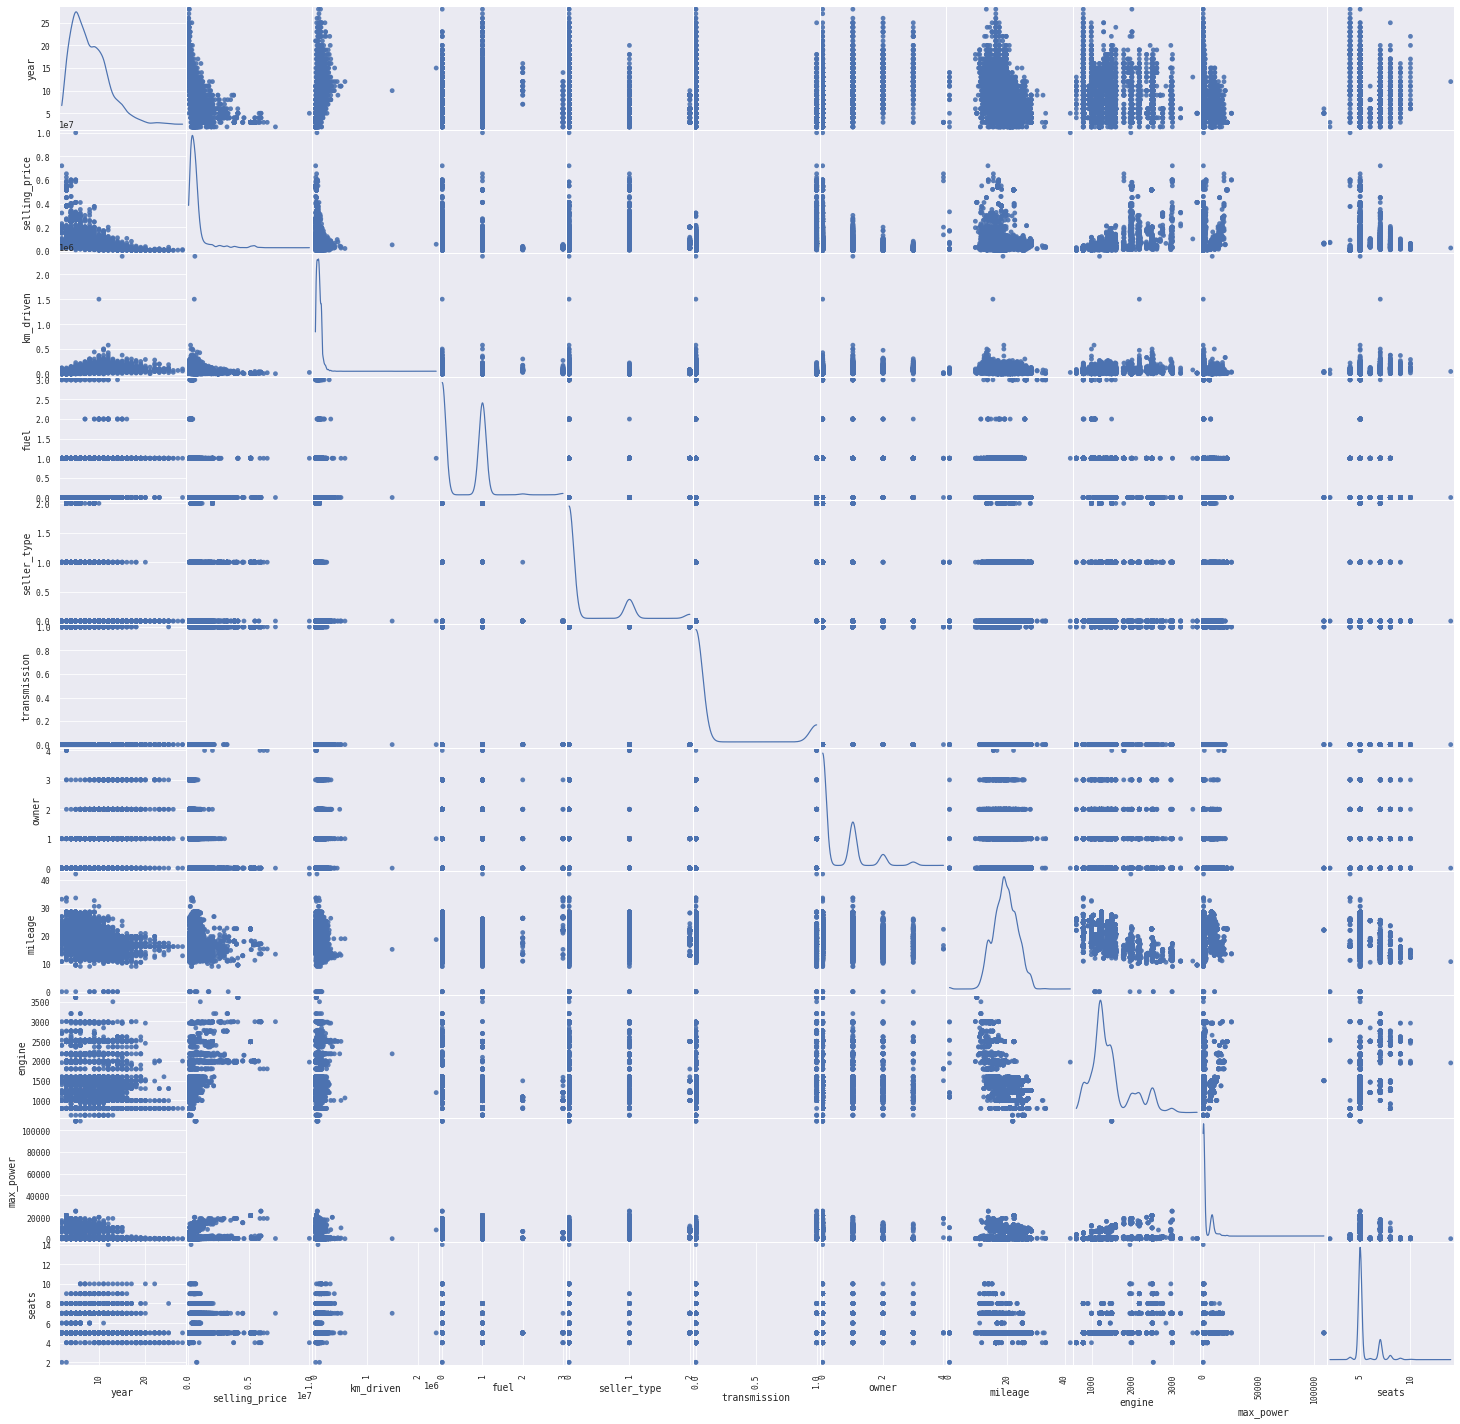

In [43]:
fig = plt.figure()
scatter_matrix(data,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

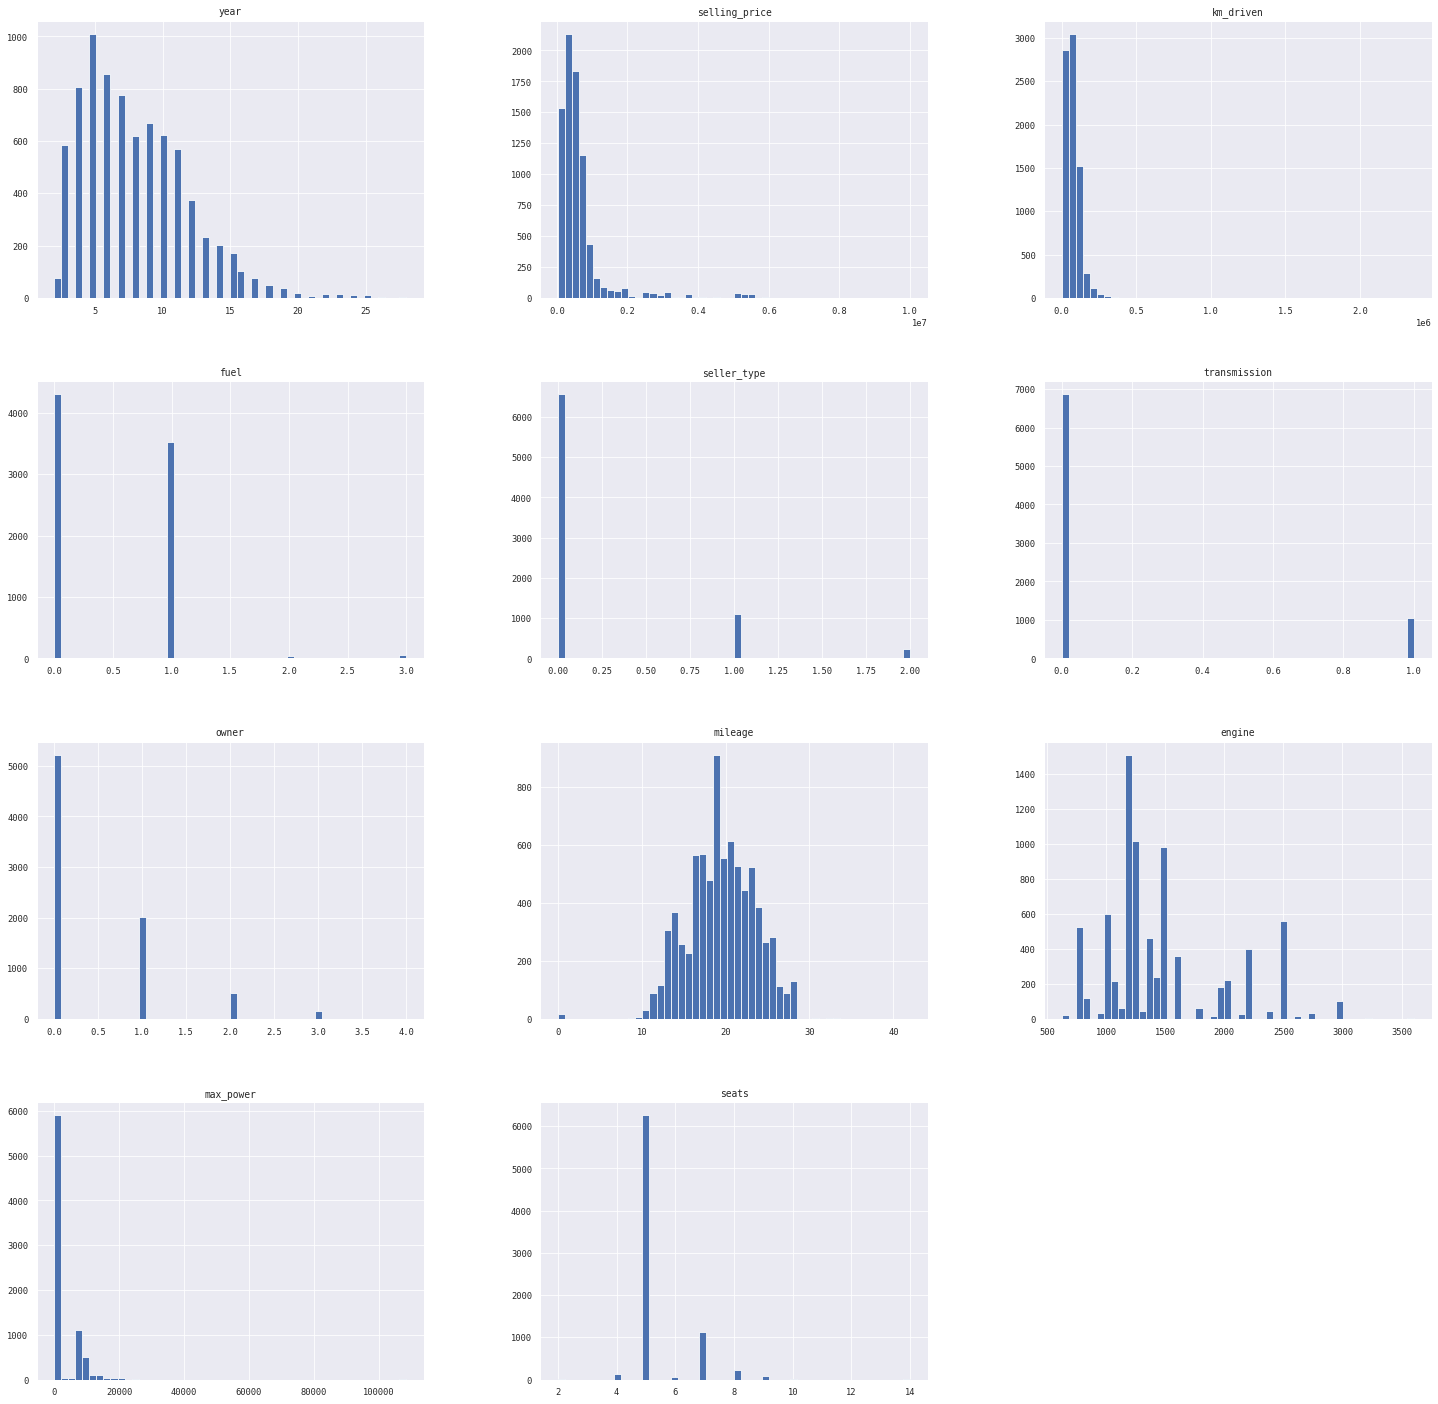

In [44]:
data.hist(figsize=(25,25),bins=50);

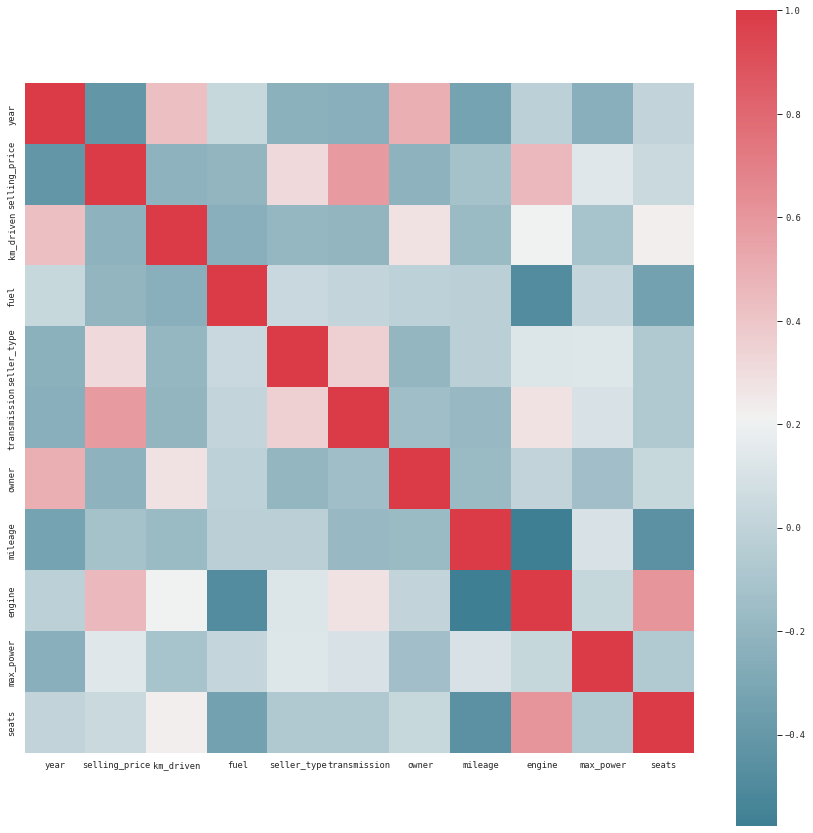

In [27]:
sns.set(context="paper",font="monospace")
one_hot_encoded_data_matrix = data.corr()
fig, axe = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
sns.heatmap(one_hot_encoded_data_matrix,vmax=1,square =True, cmap=cmap );

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int64  
 4   seller_type    7906 non-null   int64  
 5   transmission   7906 non-null   int64  
 6   owner          7906 non-null   int64  
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 741.2 KB


In [29]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaled = scaler.fit_transform(data)

In [30]:
#X = data.drop(columns=['selling_price'])
#y = data['selling_price']
dx = data.drop(columns=['selling_price'])
dy = data['selling_price']

In [31]:
#X = preprocessing.normalize(X)

In [32]:
#y.to_numpy()
X = dx.iloc[:,:].values
y=dy.iloc[:].values

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)


In [50]:
#from sklearn.linear_model import ElasticNet
#from sklearn.datasets import make_regression

#cv = KFold(n_splits=5, random_state=114, shuffle=True)
#print(cv)
#avg=[]
#for train_index, test_index in cv.split(X):
 ##  regr = ElasticNet(random_state=0)
   # regr.fit(x_train, y_train)
    #avg.append(regr.score(x_test, y_test))

#print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [47]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()

In [53]:

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
np.mean(scores)

0.5570396773487125

In [54]:
from sklearn.svm import SVR

In [55]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')

In [56]:
clf.fit(X_train, y_train)

SVR(C=0.8, epsilon=0.2, kernel='poly')

In [57]:
Ypredict = clf.predict(X_test)

In [112]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = ElasticNet(random_state=0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")


5 fold R2 score is 0.4811


In [113]:
from sklearn.linear_model import Ridge
cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    r = Ridge(alpha=0.0000001,solver='lsqr').fit(x_train, y_train)
    avg.append(r.score(x_test,y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")


5 fold R2 score is 0.3063
